# Project 5 - We rate Dogs Data Wrangling Exercise

## Table of Contents
- [Python Libraries Used](#Python-Libraries-Used)
- [Data Wrangling](#Data-Wrangling)
    - [Data Gathering](#Data-Gathering)
    - [Data Assessing](#Data-Assessing)
    - [Data Cleaning](#Data-Cleaning)
    - [Storing Data](#Storing-Data)
- [Data Analysis](#Data-Analysis)
    - [Relationship between the dog rating and likes](#Relationship-between-the-dog-rating-and-likes)
    - [Frequency that the dog predicter AI guesses something that is not a dog on the first guess](#Frequency-that-the-dog-predicter-AI-guesses-something-that-is-not-a-dog-on-the-first-guess)
    - [Analysis of factors affecting the number of retweets](#Analysis-of-factors-affecting-the-number-of-retweets)

## Python Libraries Used

In [3]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import timeit
import json
from pprint import pprint
import re
import datetime
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.api as sm

## Data Wrangling

### Data Gathering

>Within this project there are two files to be gathered. The first of these `twitter_archive_enhanced.csv` is provided and has been manually downloaded. The second file contains the dogs image predictions (`image_predictions.tsv`), this shall be programatically downloaded from this [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv).

#### Programatically downloading `image_predictions.tsv`

In [4]:
# Create Directory if it doens't already exist (Not 100% necessary as only one file being made but good to practice)
folder_name = 'dog_images'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [5]:
#store url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [6]:
#Use requests to download file and save in folder
response = requests.get(url)
file_name = url.split('/')[-1]
with open(os.path.join(folder_name, file_name), mode = 'wb') as file:
         file.write(response.content)

In [7]:
#Import both files and save as df
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
dog_images = pd.read_csv('dog_images\\image-predictions.tsv', sep = '\t')

The above code downloads and saves the tsv file into the relevent file

#### Twitter API query

In [8]:
#Create list of tweet_ids not including replies or retweets
tweet_ids = twitter_archive['tweet_id'][(twitter_archive.in_reply_to_status_id.isnull())
                                        & (twitter_archive.retweeted_status_id.isnull())]
tweet_ids.shape[0]

2097

In [9]:
#Code to create an API object
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [207]:
#Code to create an API object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)

with open('tweet_json.txt','w') as outfile:
    for ID in tweet_ids:
        start = timeit.timeit()
        try:
            tweet = api.get_status(ID)
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            continue
        end = timeit.timeit()
        print(end - start)

0.01546530000268831
0.010323400001652772
0.028085999998438638
0.00013269999908516183
0.01369209999757004
-0.002304000001458917
0.0029666000009456184
-0.0018018999980995432
0.008001400001376169
0.011891900001501199
0.0010833999986061826
0.02034289999937755
-0.016198500004975358
0.023717299998679664
-0.007053299999824958
0.014392199998837896
-0.004653100000723498
-0.008014700000785524
0.011459100001957268
0.009597500000381842
0.018562799999926938
0.0050302999989071395
-0.005637800000840798
-0.0002890999967348762
0.0002662999977474101
0.006144999995740363
0.01439100000061444
0.00015259999781847
0.021750600000814302
-0.024036599999817554
0.020356600001832703
-0.006400300004315795
0.000149500003317371
0.0231906999979401
-0.011392099997465266
0.018095899999025278
0.00012009999772999436
-0.005143200003658421
-0.00322030000097584
0.02048599999761791
0.01211479999619769
0.02160349999758182
0.005931300001975615
-0.006249700003536418
0.001286999999138061
0.006336200000077952
0.003748499999346677


0.020713699999760138
0.02108379999845056
-0.009824199998547556
-0.00012069999866071157
-0.004010100001323735
0.01601429999936954
-0.01065799999923911
-0.019339700000273297
0.02729679999902146
0.012792400000762427
-0.0005738000036217272
0.03146529999867198
-0.013287800004036399
-0.0005364000026020221
0.0015386999984912109
0.002338999998755753
0.010351199998694938
0.006141499998193467
0.022049200000765268
-0.011487100000522332
0.01449240000147256
0.01398430000335793
-0.012008599998807767
-0.006754999998520361
0.0012533000008261297
0.0207401999978174
-0.027334299997164635
0.01564650000000256
0.015059700002893806
-0.014817299997957889
-0.0008320000015373807
-0.003348099999129772
0.007945499997731531
-0.0012910999976156745
0.005638999999064254
0.009069400002772454
0.005909200001042336
-0.0036383000006026123
0.00017289999959757552
-0.0036441999982343987
0.00967339999624528
0.015200700003333623
-0.022013800000422634
-0.007269000001542736
0.008695000000443542
-0.006484799996542279
-0.004912499

0.008627300001535332
0.012550799998280127
-5.7299996115034446e-05
0.0067209000008006115
-0.0007533999996667262
0.0041241000035370234
0.010826300000189804
0.016978000003291527
-0.01428939999823342
0.018433400000503752
0.0006369000002450775
0.0011008999972546007
0.006018500000209315
0.008184300000721123
0.0018588999992061872
0.002416599996649893
0.017090100001951214
0.009955800000170711
0.01244109999970533
0.01918139999906998
-0.00034860000232583843
0.007340699998167111
8.24999988253694e-05
3.1200001103570685e-05
-0.007826699998986442
0.011486600000353064
0.009220900003128918
-0.0274223999986134
0.0039321999975072686
-0.008205199999792967
0.011436899996624561
0.005100400001538219
-0.00678199999674689
0.006813500000134809
-0.0018727999959082808
0.018421400000079302
-0.005018700001528487
0.02144590000170865
-0.003684799998154631
0.0032015999968280084
-0.035347500001080334
0.004708799999207258
0.011328399999911198
0.01987820000067586
-0.04655760000241571
0.014932599995518103
0.0002272000019

In [10]:
#Iterate through each line of json file to convert to python dictionary
df_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:
    for line in json_file:
        data = json.loads(line)
        created_at = data['created_at']
        text = data['text']
        tweet_id = data['id']
        retweet_count= data['retweet_count']
        likes = data['favorite_count']
        df_list.append({'created_at': created_at, 
                            'text': text,
                            'tweet_id': tweet_id,
                            'retweet_count': retweet_count,
                            'likes': likes})

In [11]:
#convert dictionary into pandas dataframe
api_data = pd.DataFrame(df_list, columns = ['tweet_id', 'created_at', 'likes', 'retweet_count'])
api_data.shape[0]

893

In [12]:
#Display three inputs for clarity
#twitter_archive
#dog_images
#api_data

### Data Assessing

> In this section we'll undertake a visual a programtic assessment of the data to identify eight quality issues and two tidiness issues. We'll start with a visual assessment withing this notebook using a sample of ten rows from each of our three dataframes.

#### Visual Quality Assessments

##### Quality Issues within `twitter_archive` *(visual assessment)*
- Source column url not useable in current format
- Some names state '**a**' when sentence starts "**This is a...**"

In [13]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


##### Quality Issues within `dog_images` *(visual assessment)*
- No quality issues identifed with `dog_images` at this stage

In [14]:
dog_images.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
975,707014260413456384,https://pbs.twimg.com/media/Cc_RsVlXEAIzzlX.jpg,1,Chihuahua,0.583780,True,Italian_greyhound,0.129683,True,toy_terrier,8.915270e-02,True
270,670822709593571328,https://pbs.twimg.com/media/CU89schWIAIHQmA.jpg,1,web_site,0.993887,False,Chihuahua,0.001252,True,menu,5.987510e-04,False
1968,868552278524837888,https://pbs.twimg.com/media/DA23sCeVoAE3uF0.jpg,1,whippet,0.378151,True,Italian_greyhound,0.275935,True,American_Staffordshire_terrier,9.499060e-02,True
879,698549713696649216,https://pbs.twimg.com/media/CbG_QRJXEAALVWy.jpg,1,French_bulldog,0.998544,True,Boston_bull,0.001404,True,boxer,2.322000e-05,True
647,681679526984871937,https://pbs.twimg.com/media/CXXP5O4WEAA4dgS.jpg,1,birdhouse,0.472351,False,teddy,0.142058,False,pot,3.290590e-02,False
149,668636665813057536,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,komondor,0.999956,True,llama,0.000043,False,ram,2.160900e-07,False
489,675522403582218240,https://pbs.twimg.com/media/CV_wCh8W4AEWWZ9.jpg,1,cocker_spaniel,0.299708,True,golden_retriever,0.263665,True,Irish_setter,8.032330e-02,True
1686,814638523311648768,https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg,2,golden_retriever,0.650814,True,kuvasz,0.053281,True,cocker_spaniel,3.543960e-02,True
1792,830956169170665475,https://pbs.twimg.com/ext_tw_video_thumb/83095...,1,kuvasz,0.451516,True,golden_retriever,0.317196,True,English_setter,1.327590e-01,True
1335,758041019896193024,https://pbs.twimg.com/media/CoUaSKEXYAAYsAl.jpg,1,bookshop,0.794272,False,Cardigan,0.051265,True,Bernese_mountain_dog,2.659630e-02,True


##### Quality Issues within `api_data` *(visual assessment)*
- No quality issues identifed with `api_data` at this stage

In [15]:
api_data.sample(10)

,tweet_id,created_at,likes,retweet_count
365,815990720817401858,Mon Jan 02 18:38:42 +0000 2017,5090,1062
141,858843525470990336,Mon May 01 00:40:27 +0000 2017,15147,3363
691,758828659922702336,Fri Jul 29 00:57:05 +0000 2016,11396,3912
174,850145622816686080,Fri Apr 07 00:38:06 +0000 2017,16223,3771
651,765395769549590528,Tue Aug 16 03:52:26 +0000 2016,27058,3455
663,762035686371364864,Sat Aug 06 21:20:40 +0000 2016,32520,15866
885,734559631394082816,Mon May 23 01:40:38 +0000 2016,1496,396
698,758041019896193024,Tue Jul 26 20:47:17 +0000 2016,2744,380
359,817056546584727552,Thu Jan 05 17:13:55 +0000 2017,8804,1698
656,763837565564780549,Thu Aug 11 20:40:41 +0000 2016,12838,4241


#### Programatic Assessments

In this sections each of the three dataframes shall be programatically assessed using the following pandas functions
- `.info()`
- `.describe()`
- `.value_counts()` for specific columns of interest

##### Quality Issues within `twitter_archive` *(programatic assessment)*
- Retweets and replies included in data set
- Inconsistent denominators
- `timestamp` has incorrect datatype
- Inconsistency in capatilsation within `name` column

In [16]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [17]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# Checking for duplicated tweets
twitter_archive.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
715360349751484417    1
666817836334096384    1
794926597468000259    1
673705679337693185    1
700151421916807169    1
Name: tweet_id, Length: 2356, dtype: int64

In [19]:
#confirms observation made in visual assessment
twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
           ... 
Godzilla      1
Amélie        1
Snicku        1
Cedrick       1
Stuart        1
Name: name, Length: 957, dtype: int64

##### Quality Issues within `dog_images` *(programatic assessment)*
- Inconsistencies in capatilsations within `p1, p2 & p3` columns

In [20]:
dog_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [21]:
dog_images.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
dog_images.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
leaf_beetle             1
bow                     1
timber_wolf             1
pitcher                 1
robin                   1
Name: p1, Length: 378, dtype: int64

In [23]:
dog_images.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
quail                   1
mosquito_net            1
soccer_ball             1
otter                   1
cradle                  1
Name: p2, Length: 405, dtype: int64

In [24]:
dog_images.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
conch                  1
toyshop                1
canoe                  1
assault_rifle          1
guillotine             1
Name: p3, Length: 408, dtype: int64

##### Quality Issues within `api_data` *(programatic assessment)*
- `created_at` column has incorrect datatype

In [25]:
api_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 4 columns):
tweet_id         893 non-null int64
created_at       893 non-null object
likes            893 non-null int64
retweet_count    893 non-null int64
dtypes: int64(3), object(1)
memory usage: 28.0+ KB


In [26]:
api_data.describe()

,tweet_id,likes,retweet_count
count,8.930000e+02,893.000000,893.000000
mean,8.039114e+17,15495.552072,4352.139978
std,4.572747e+16,15100.292307,5828.747814
min,7.327261e+17,891.000000,156.000000
25%,7.612929e+17,6712.000000,1782.000000
50%,8.001414e+17,11008.000000,2869.000000
75%,8.389530e+17,19813.000000,4690.000000
max,8.924206e+17,157970.000000,78785.000000


#### Visual Tidiness Assessments

We can see from looking at `twitter arhive` that the columns `doggo, floofer, pupper and puppo` could be categorised into one column, called `dog type`, therefore this is our first tidiness issue. Secondly `api_data` can be merged through `tweet_id` into the `twitter_archive` dataframe
- Combine `twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']]` columns into one
- Merge `api_data` into `twitter_archive` dataframe

### Data Cleaning

> In this section we shall work carry out the assessments highlighted in the previous section, first defining, coding and then testing each item. Before starting, we'll create new dataframes to ensure the source data is unchanged:

In [27]:
twitter_archive_clean = twitter_archive.copy()
dog_images_clean = dog_images.copy()
api_data_clean = api_data.copy()

#### 1. Source URL column in `twitter_archive` not usable in current format

##### Define
Use `str.split` to take only text between quotation marks

##### Code

In [28]:
twitter_archive_clean.source = twitter_archive_clean.source.str.extract('(?<=\")(.*?)(?=\")')

##### Test

In [29]:
twitter_archive_clean.source.sample(5)

2186    http://twitter.com/download/iphone
380     http://twitter.com/download/iphone
2210    http://twitter.com/download/iphone
1508    http://twitter.com/download/iphone
287     http://twitter.com/download/iphone
Name: source, dtype: object

#### 2. Some names within `twitter_archive.name` state '**a**' when sentence starts "**This is a...**"

##### Define

> Following a further visual assessment of the text line from which the names are extracted, lines starting with **"This is a..."** do not appear to contain any names, resultantly, all names stating **"a"** shall be changed to none
>
> Create a `for` loop to iterate through `twitter_achive.names` creating a list with all **"a"** values changed to **"None"**

##### Code

In [30]:
names_clean = []
names = twitter_archive_clean.name
for name in names:
    if name == 'a':
        names_clean.append('None')
    else:
        names_clean.append(name)
        
twitter_archive_clean.name = names_clean

##### Test

In [31]:
twitter_archive_clean.name.value_counts()

None        800
Charlie      12
Cooper       11
Oliver       11
Lucy         11
           ... 
Godzilla      1
Amélie        1
Snicku        1
Cedrick       1
Stuart        1
Name: name, Length: 956, dtype: int64

#### 3. Retweets and replies included within `twitter_archive` data set

##### Define

Use `.query` to filter out any retweets and favourites and then resave `twitter_archive_clean`

##### Code

In [32]:
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean.in_reply_to_status_id.isnull())
                                        & (twitter_archive_clean.retweeted_status_id.isnull())]
twitter_archive_clean = twitter_archive_clean.reset_index(drop=True)

##### Test

In [33]:
twitter_archive_clean.in_reply_to_status_id.unique()

array([nan])

In [34]:
twitter_archive_clean.retweeted_status_id.unique()

array([nan])

#### 4. Some denominators not equal to 10 within `twitter_archive.rating_denominator`

> From further visual assessment each dog carries a rating out of 10. When there are multiple dogs within a photo the denominator increases by 10 for each dog on occastions. e.g 20 if 2 dogs are in the photo. Other errors within the denominator column have come from things such as 24/7 and the shop 7/11 being referenced within the tweet. To clean this data the following shall be undertaken:
>
> First take a denominator /10 if it is there, then a factor of 10, if neither of these are available no denominator shall be passed. We shall also reset the numerators within this stage.
>
> Once complete we'll factorise all fractions so they are /10 for easier analysis.

##### Define

- Create for loop using regex to extract values when denominator /10, then denominators that are factors of 10
- Creat loop to factorise numerators and denominators to be /10

##### Code

In [35]:
# Reextract denominators and numerators, specifying only factors of ten
den = []
text = twitter_archive_clean['text']
for line in text:
    try:
        x = (re.findall(r'\d+\/10+s?(?![\w\d])', line)[-1])
        x = x.replace('s', '')
    except:
        try:
            x = (re.findall(r'\d+\/\d+[0]s?(?![\w\d])', line)[-1])
            x = x.replace('s', '')
        except:
            x = ('0/0')
    den.append(x)

len(den)

2097

In [36]:
#Split columns into numerators and denominators
twitter_archive_clean['rat_den'] = den
twitter_archive_clean['rat_num'], twitter_archive_clean['rat_den'] = twitter_archive_clean['rat_den'].str.split('/',1).str

In [37]:
#factorise fractions so they are /10
twitter_archive_clean[['rat_den', 'rat_num']] = twitter_archive_clean[['rat_den', 'rat_num']].astype(int)
den = []
num = []

for i in range(len(twitter_archive_clean)):
    dens = twitter_archive_clean['rat_den'][i]
    nums = twitter_archive_clean['rat_num'][i]
    if dens != 0:
        x = dens / 10
        den.append(dens/x)
        num.append(nums/x)
    else:
        den.append(0)
        num.append(0)
twitter_archive_clean['rat_den'] = den
twitter_archive_clean['rat_num'] = num

In [38]:
#Drop original numerator and denominator columns
twitter_archive_clean = twitter_archive_clean.drop(['rating_numerator', 'rating_denominator'], axis = 1)

##### Test

In [39]:
twitter_archive_clean.rat_den.value_counts()

10.0    2096
0.0        1
Name: rat_den, dtype: int64

In [40]:
#Manually check text where value = 0
twitter_archive_clean[twitter_archive_clean['rat_den'] == 0].text.index

Int64Index([403], dtype='int64')

In [41]:
# We can see from the output that no dog rating was included in this tweet
twitter_archive_clean.iloc[403, 5]

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [42]:
twitter_archive_clean.rat_num.value_counts()

12.0      490
10.0      430
11.0      419
13.0      289
9.0       153
8.0       101
7.0        53
14.0       39
5.0        33
6.0        33
3.0        19
4.0        16
2.0        10
1.0         5
0.0         2
27.0        1
1776.0      1
26.0        1
420.0       1
75.0        1
Name: rat_num, dtype: int64

#### 5. Object type within `twitter_archive.timestamp` is incorrect

##### Define
> Use `.astype('datetime64')` to change datatype of column

##### Code

In [43]:
twitter_archive_clean['timestamp'] = twitter_archive_clean.timestamp.astype('datetime64')

##### Test

In [44]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
rat_den                       2097 non-null float64
rat_num                       2097 non-null float64
dtypes: datetime64[ns](1), f

#### 6. Inconsistency in capiltalisation within `twitter_archive.name` column

##### Define
> Use `.capitalize` to ensure first letter is capitalised throughout

##### Code

In [45]:
twitter_archive_clean.name = twitter_archive_clean.name.str.capitalize()

##### Test

In [46]:
twitter_archive_clean.name.sample(15)

375       Cooper
22        Canela
123        Albus
263          Not
1434        Kreg
300       Tucker
929         None
1037        None
189        Daisy
1249        None
916     Flurpson
1247        None
1550        None
636        Titan
1935        None
Name: name, dtype: object

#### 7. Inconsistencies in capiltalisation within `dog_images.p1, dog_images.p2 & dog_images.p3` columns

##### Define
> Capitalise the first letter of each item using `.capitalize` to ensure consistency throughout

##### Code

In [47]:
dog_images_clean.p1 = dog_images_clean.p1.str.capitalize()
dog_images_clean.p2 = dog_images_clean.p2.str.capitalize()
dog_images_clean.p3 = dog_images_clean.p3.str.capitalize()

##### Test

In [48]:
dog_images_clean[['p1', 'p2', 'p3']].sample(15)

,p1,p2,p3
25,Guinea_pig,Skunk,Hamster
646,Pomeranian,Chow,Pekinese
1428,Basset,Walker_hound,Beagle
350,Doberman,Rottweiler,Appenzeller
817,German_short-haired_pointer,Bluetick,Basset
57,Chihuahua,Pug,Brabancon_griffon
191,Toy_poodle,Miniature_poodle,Standard_poodle
356,Toy_poodle,Miniature_poodle,Toilet_tissue
1380,Dalmatian,Whippet,American_staffordshire_terrier
496,Maltese_dog,West_highland_white_terrier,Toy_poodle


#### 8. `api_data.created_at` column has incorrect datatype

##### Define
> Use `.astype('datetime64')` to change datatype of `api_data.created_at` column

##### Code

In [49]:
api_data_clean.created_at = api_data_clean.created_at.astype('datetime64')

##### Test

In [50]:
api_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 4 columns):
tweet_id         893 non-null int64
created_at       893 non-null datetime64[ns]
likes            893 non-null int64
retweet_count    893 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 28.0 KB


#### 9. Combine `twitter_archive[['doggo', 'floofer', 'pupper', 'puppo']]` columns into one

##### Define

> Merge the above columns into one, keeping the types if there is one, and leaving only one 'None' if there is not. Finally drop the above columns

In [51]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,doggo,floofer,pupper,puppo,rat_den,rat_num
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,None,None,None,None,10.0,13.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,None,None,None,None,10.0,13.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,None,None,None,None,10.0,12.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,None,None,None,None,10.0,13.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,None,None,None,None,10.0,12.0


##### Code

In [52]:
if 'doggo' in twitter_archive_clean.columns:
    twitter_archive_clean['dog_type'] = ""
    y = ['doggo', 'floofer', 'pupper', 'puppo']
    twitter_archive_clean['dog_type'] = twitter_archive_clean[twitter_archive_clean.columns
                                                              [(twitter_archive_clean.columns.get_loc('doggo')):
                                                               (twitter_archive_clean.columns.get_loc('puppo')+1)]].apply(
        lambda x: '/'.join(x.dropna().astype(str)), axis=1)
    twitter_archive_clean['dog_type'] = twitter_archive_clean['dog_type'].str.replace("None/", "").str.replace("None", "")
    name_complete = []
    for name in twitter_archive_clean['dog_type']:
        if name == "":
            name_complete.append('None')
        elif name.rfind("/") > 0:
            last_char_index = name.rfind("/")
            new_string = name[:last_char_index]
            name_complete.append(new_string)
        else:
            name_complete.append(name)
    twitter_archive_clean['dog_type'] = name_complete

In [53]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

##### Test

In [54]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,rat_den,rat_num,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,Phineas,10.0,13.0,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,Tilly,10.0,13.0,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,Archie,10.0,12.0,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,http://twitter.com/download/iphone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,Darla,10.0,13.0,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,http://twitter.com/download/iphone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,Franklin,10.0,12.0,None


In [55]:
twitter_archive_clean.dog_type.value_counts()

None             1761
pupper            221
doggo              73
puppo              23
floofer             9
doggo/pupper        9
doggo/floofer       1
Name: dog_type, dtype: int64

#### 10. Merge `api_data` into `twitter_archive` dataframe

##### Define
> Use merge function to combine the above dataframes on tweet_id

##### Code

In [56]:
api_data_clean

,tweet_id,created_at,likes,retweet_count
0,892420643555336193,2017-08-01 16:23:56,36547,7795
1,892177421306343426,2017-08-01 00:17:27,31491,5771
2,891815181378084864,2017-07-31 00:18:03,23732,3819
3,891689557279858688,2017-07-30 15:58:51,39880,7961
4,891327558926688256,2017-07-29 16:00:24,38089,8605
...,...,...,...,...
888,733482008106668032,2016-05-20 02:18:32,3157,957
889,733460102733135873,2016-05-20 00:51:30,4228,1291
890,733109485275860992,2016-05-19 01:38:16,50487,17008
891,732732193018155009,2016-05-18 00:39:02,2457,541


In [57]:
twitter_archive_clean = pd.merge(twitter_archive_clean, api_data_clean, on=['tweet_id'], how='left')

##### Test

In [58]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
name                          2097 non-null object
rat_den                       2097 non-null float64
rat_num                       2097 non-null float64
dog_type                      2097 non-null object
created_at                    893 non-null datetime64[ns]
likes                         893 non-null float64
retweet_count                 893 non-null float64
dtypes: datetime64[ns

In [59]:
twitter_archive_clean['source']

0       http://twitter.com/download/iphone
1       http://twitter.com/download/iphone
2       http://twitter.com/download/iphone
3       http://twitter.com/download/iphone
4       http://twitter.com/download/iphone
                       ...                
2092    http://twitter.com/download/iphone
2093    http://twitter.com/download/iphone
2094    http://twitter.com/download/iphone
2095    http://twitter.com/download/iphone
2096    http://twitter.com/download/iphone
Name: source, Length: 2097, dtype: object

### Storing Data

In [60]:
#Save dataframes to sql database
from sqlalchemy import create_engine
engine = create_engine('sqlite:///firstdatabase.db', echo=False)

In [61]:
twitter_archive_clean.to_sql('Twitter_archive_clean', engine, if_exists = 'replace', index = False)
dog_images_clean.to_sql('dog_images_clean', engine, if_exists = 'replace', index = False)

In [63]:
#Save dataframes as csv files
twitter_archive_clean.to_csv('twitter_archive_clean.master')
dog_images_clean.to_csv('dog_images_clean.csv')

## Data Analysis

> In this section we shall use the data within sqlite database created in the previous section to produce three insights into the data. We shall be looking into the following:
> - Relationship between the dog rating and likes
> - Frequency that the dog predicter AI guesses something that is not a dog on the first guess
> - Relationship the following have on the number of retweets:
>      - Dog rating
>      - Dog Type

### Relationship between the dog rating and likes
> In this section we'll build a simple linear regression model to assess the relationship between the aforementioned parameters and see if it is statistically significant

In [100]:
df = pd.read_sql_query('SELECT rat_num, likes FROM Twitter_archive_clean', engine)
df.head()

,rat_num,likes
0,13.0,36547.0
1,13.0,31491.0
2,12.0,23732.0
3,13.0,39880.0
4,12.0,38089.0


In [101]:
#First we'll further clean this data for our purpuses by dropping all null values
df = df.dropna()

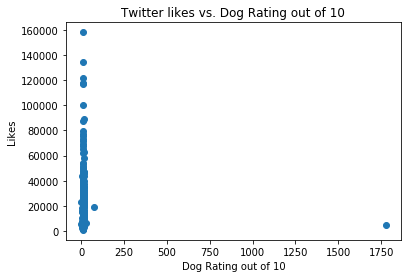

In [102]:
plt.scatter(df['rat_num'], df['likes']);
plt.xlabel('Dog Rating out of 10');
plt.ylabel('Likes');
plt.title('Twitter likes vs. Dog Rating out of 10');

In [103]:
df[df['rat_num'] == 1776]

,rat_num,likes
770,1776.0,5191.0


In [113]:
top_perc = df.rat_num.quantile(0.99)
bot_perc = df.rat_num.quantile(0.01)

In [115]:
#To improve data we shall drop the extreme outlier
df = df.drop(df[df['rat_num'] > top_perc].index, axis = 0)
df = df.drop(df[df['rat_num'] < bot_perc].index, axis = 0)
df

,rat_num,likes
0,13.0,36547.0
1,13.0,31491.0
2,12.0,23732.0
3,13.0,39880.0
4,12.0,38089.0
...,...,...
895,10.0,3157.0
896,11.0,4228.0
897,12.0,50487.0
898,12.0,2457.0


In [116]:
#Now to set up the simple linear regression model
df['intercept'] = 1
x = sm.OLS(df['likes'], df[['intercept', 'rat_num']])

In [117]:
results = x.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     149.0
Date:                Thu, 27 Feb 2020   Prob (F-statistic):           9.22e-32
Time:                        10:33:20   Log-Likelihood:                -9660.2
No. Observations:                 881   AIC:                         1.932e+04
Df Residuals:                     879   BIC:                         1.933e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.677e+04   4312.903     -8.526      0.000   -4.52e+04   -2.83e+04
rat_num     4441.8270    363.929     12.205      0.000    3727.556    5156.098
==============================================================================
Omnibus:                      786.719   Durbin-Watson:                   1.841
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26509.551
Skew:                           4.004   Prob(JB):                         0.00
Kurtosis:                      28.653   Cond. No.                         109.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

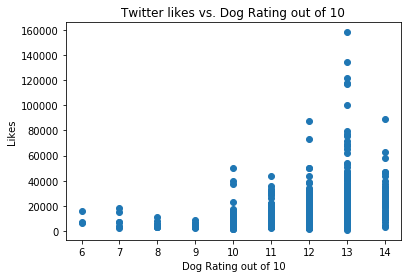

In [118]:
plt.scatter(df['rat_num'], df['likes']);
plt.xlabel('Dog Rating out of 10');
plt.ylabel('Likes');
plt.title('Twitter likes vs. Dog Rating out of 10');

The conclusions to this analysis are discussed in **'act_report'**.

### Frequency that the dog predicter AI guesses something that is not a dog on the first guess
> In this section we'll create a logistic regression model to test how statistically significant the guessing confidence is in determining whether or not the guess is a dog.

In [72]:
df = pd.read_sql_query('SELECT p1_conf, p1_dog FROM dog_images_clean', engine)
df.head()

,p1_conf,p1_dog
0,0.465074,1
1,0.506826,1
2,0.596461,1
3,0.408143,1
4,0.560311,1


In [73]:
df = df.dropna()

In [74]:
df['intercept'] = 1

In [75]:
logit_mod = sm.Logit(df['p1_dog'], df[['intercept', 'p1_conf']])

In [76]:
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.567661
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 p1_dog   No. Observations:                 2075
Model:                          Logit   Df Residuals:                     2073
Method:                           MLE   Df Model:                            1
Date:                Thu, 27 Feb 2020   Pseudo R-squ.:                 0.01244
Time:                        10:27:40   Log-Likelihood:                -1177.9
converged:                       True   LL-Null:                       -1192.7
Covariance Type:            nonrobust   LLR p-value:                 5.081e-08
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4545      0.116      3.919      0.000       0.227       0.682
p1_conf        1.0099      0.187      5.407      0.000       0.644       1.376
==============================================================================
"""

### Relationship between dog type and the number of retweets

> In this section we shall use a mulitple linear regression model to assess the factos affecting the number of retweets produced.

In [77]:
df = pd.read_sql_query('SELECT dog_type, retweet_count FROM Twitter_archive_clean', engine)
df.head()

,dog_type,retweet_count
0,None,7795.0
1,None,5771.0
2,None,3819.0
3,None,7961.0
4,None,8605.0


In [78]:
df = df.dropna()
df.dog_type.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo/floofer',
       'doggo/pupper'], dtype=object)

In [79]:
df[['None', 'doggo', 'puppo', 'pupper', 'floofer', 'doggo/floofer', 'doggo/pupper']] = pd.get_dummies(df['dog_type'])

In [80]:
df['intercept'] =1

In [81]:
x = sm.OLS(df['retweet_count'], df[['doggo', 'puppo', 'pupper', 'floofer', 'doggo/floofer', 'doggo/pupper']])
results = x.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          retweet_count   R-squared (uncentered):                   0.109
Model:                            OLS   Adj. R-squared (uncentered):              0.103
Method:                 Least Squares   F-statistic:                              18.04
Date:                Thu, 27 Feb 2020   Prob (F-statistic):                    8.03e-20
Time:                        10:27:41   Log-Likelihood:                         -9156.0
No. Observations:                 893   AIC:                                  1.832e+04
Df Residuals:                     887   BIC:                                  1.835e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
doggo          6614.3433    841.503      7.860      0.000    4962.773    8265.913
puppo          3088.0000   6888.002      0.448      0.654   -1.04e+04    1.66e+04
pupper         3932.0000   2296.001      1.713      0.087    -574.228    8438.228
floofer        4617.0000   2603.420      1.773      0.076    -492.582    9726.582
doggo/floofer  4169.5000    874.777      4.766      0.000    2452.626    5886.374
doggo/pupper   6004.3043   1436.248      4.181      0.000    3185.464    8823.145
==============================================================================
Omnibus:                      890.604   Durbin-Watson:                   1.502
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51614.670
Skew:                           4.556   Prob(JB):                         0.00
Kurtosis:                      39.113   Cond. No.                         8.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""